In [ ]:
import pandas as pd

df = pd.read_excel('/content/data.xlsx')

df.head()


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# EDA для анализа первичного анализа данных
print("Размер данных:", df.shape)
df.info()
df.describe()


Размер данных: (1001, 214)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


In [ ]:
# Проверка пропущенных значений
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0
MaxPartialCharge,3
MinPartialCharge,3
MaxAbsPartialCharge,3
MinAbsPartialCharge,3
BCUT2D_MWHI,3
BCUT2D_MWLOW,3
BCUT2D_CHGHI,3
BCUT2D_CHGLO,3
BCUT2D_LOGPHI,3
BCUT2D_LOGPLOW,3


Мы загрузили датасет - в нём 1001 строка и 214 признаков. Всё числовое, что удобно для моделирования. Пропущенных значений почти нет, но 12 признаков содержат по 3 пропуска  - немного, можно либо удалить эти строки, либо аккуратно заполнить средним/медианой.




In [ ]:
# Раз пропусков не много - удалим
df = df.dropna()
print("Размер данных после удаления пропусков:", df.shape)


Размер данных после удаления пропусков: (998, 214)


In [ ]:
df = df.rename(columns={
    'IC50, mM': 'IC50',
    'CC50, mM': 'CC50'
})


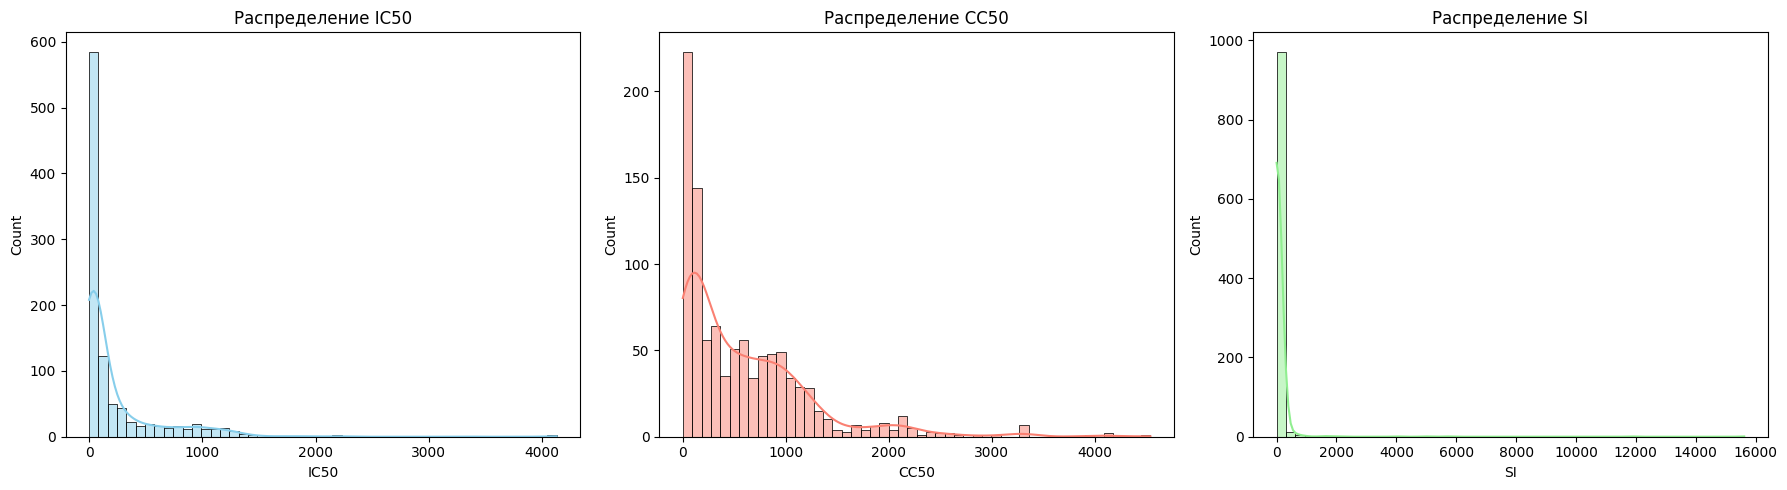

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# IC50
plt.subplot(1, 3, 1)
sns.histplot(df['IC50'], bins=50, kde=True, color='skyblue')
plt.title('Распределение IC50')

# CC50
plt.subplot(1, 3, 2)
sns.histplot(df['CC50'], bins=50, kde=True, color='salmon')
plt.title('Распределение CC50')

# SI
plt.subplot(1, 3, 3)
sns.histplot(df['SI'], bins=50, kde=True, color='lightgreen')
plt.title('Распределение SI')

plt.tight_layout()
plt.show()


IC50 - данные сильно скошены вправо, основной массив до 1000, дальше длинный хвост, есть выбросы. Нормальности нет.

CC50 - ситуация похожая: скучинность в начале графа, выбросы дальше 2000–4000, хвост широкий, распределение асимметричное.

SI - самый жёсткий перекос: почти все значения до 100, но единичные точки уходят за 15000. Очень длинный хвост, экстремальные выбросы. Распределение ненормальное, возможно нужна трансформация.

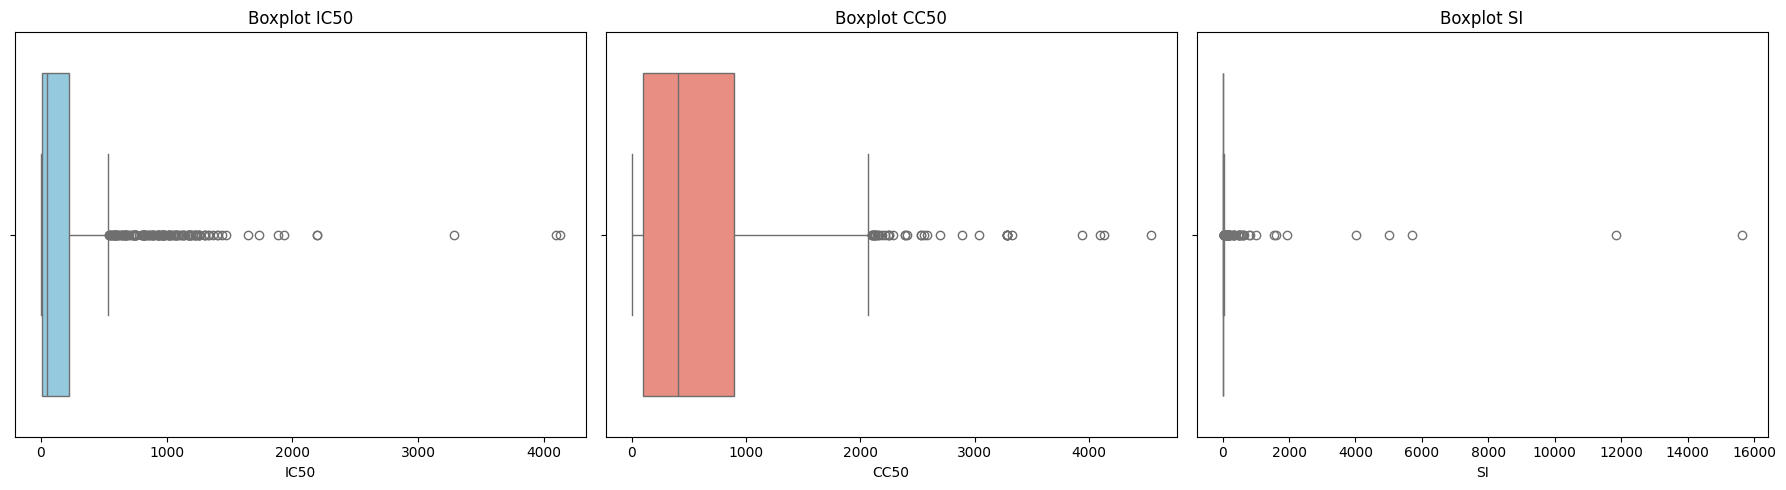

In [ ]:
plt.figure(figsize=(18, 5))

# Boxplot IC50
plt.subplot(1, 3, 1)
sns.boxplot(x=df['IC50'], color='skyblue')
plt.title('Boxplot IC50')

# Boxplot CC50
plt.subplot(1, 3, 2)
sns.boxplot(x=df['CC50'], color='salmon')
plt.title('Boxplot CC50')

# Boxplot SI
plt.subplot(1, 3, 3)
sns.boxplot(x=df['SI'], color='lightgreen')
plt.title('Boxplot SI')

plt.tight_layout()
plt.show()


визуально подтвердили выбросы. IC50  очень много выбросов после 1000

CC50 чуть мяньше, но аналогично

SI экстремальные значения уходят за 10 000

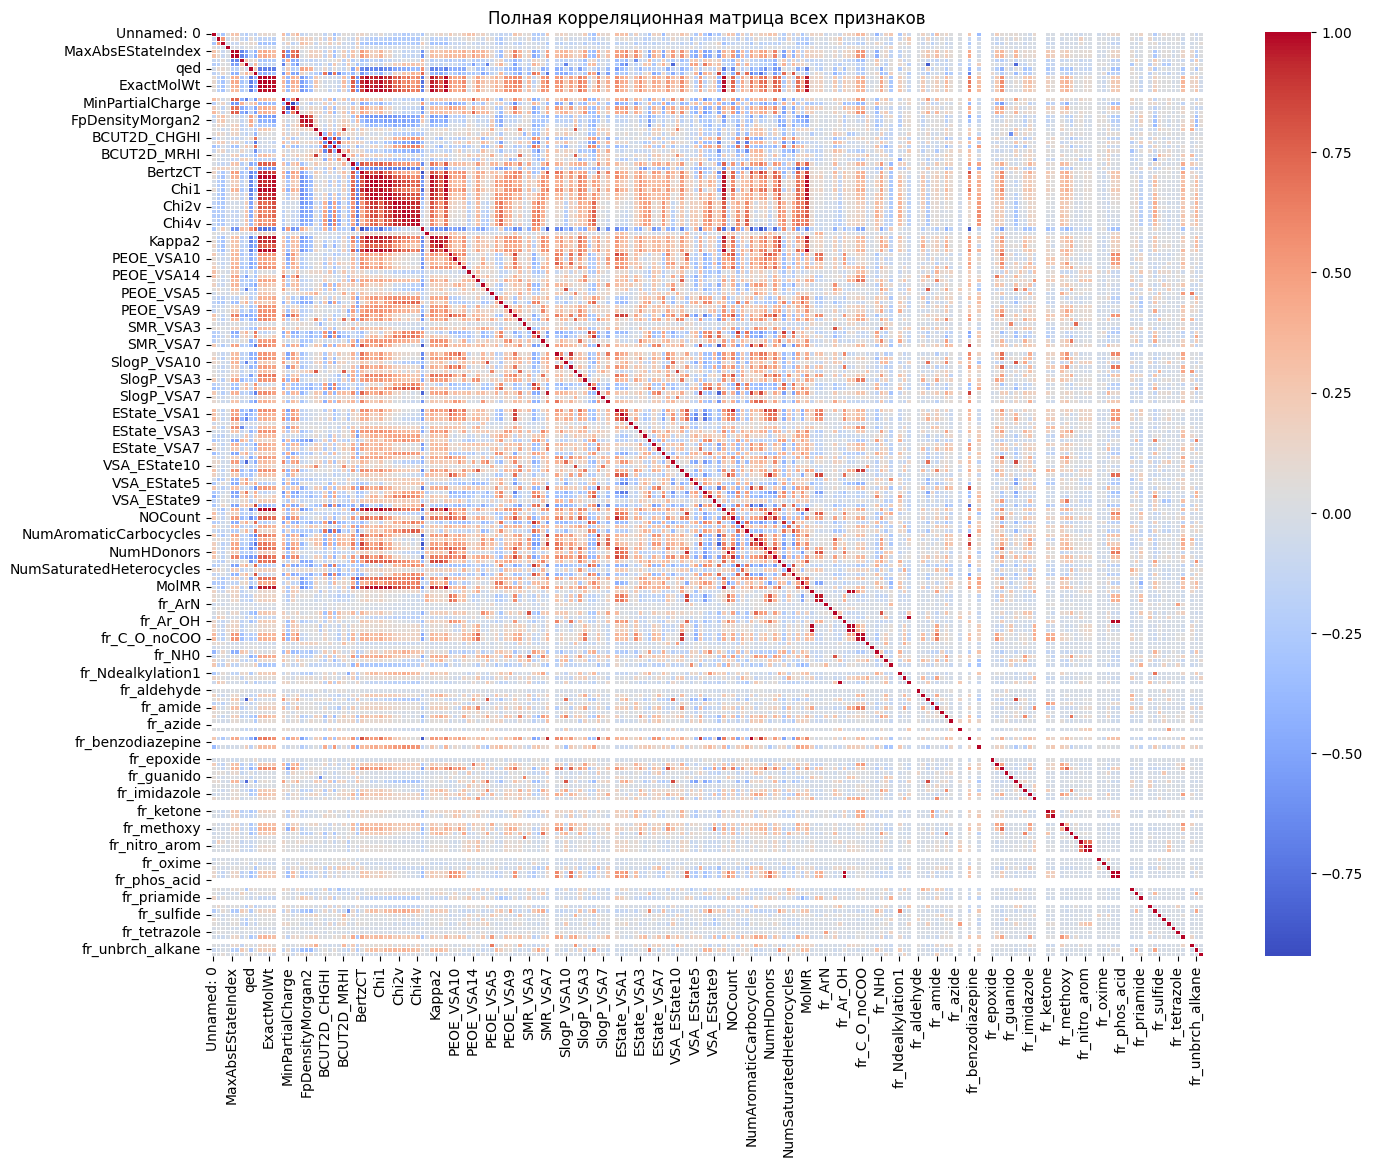

In [ ]:
#построим корреляционную матрицу
plt.figure(figsize=(16, 12))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Полная корреляционная матрица всех признаков')
plt.show()


Корреляционная структура признаков сложна:

видны плотные кластеры сильно коррелирующих признаков особенно в начале списка (около BCUT, PEOE, SlogP и Estate), с ярко-красными или синими квадратами.

также встречаются признаки с почти нулевой корреляцией, что хорошо, ведь они могут нести независимую друг о друга информацию.

немного признаков коррелируют между собой почти на уровне около 0.9 - это мы удалим или объединим, чтобы избежать мультиколлинеарности.

общая структура довольно видится разреженной, то есть дублирующих признаков немного и нужно оставить максимум информации в модели.



In [ ]:
# 10 топ признаков с каждой из целевых переменных
top_ic50 = corr_matrix['IC50'].abs().sort_values(ascending=False)[1:11]
top_cc50 = corr_matrix['CC50'].abs().sort_values(ascending=False)[1:11]
top_si = corr_matrix['SI'].abs().sort_values(ascending=False)[1:11]

print("Топ 10 по корреляции с IC50:\n", top_ic50)
print("\nТоп 10 по корреляции с CC50:\n", top_cc50)
print("\nТоп 10 по корреляции с SI:\n", top_si)


Топ 10 по корреляции с IC50:
 CC50            0.522534
VSA_EState4     0.271743
Chi2n           0.252705
PEOE_VSA7       0.250772
fr_Ar_NH        0.247728
fr_Nhpyrrole    0.247728
Chi2v           0.246602
Chi4v           0.240485
Chi4n           0.239209
Chi3n           0.235491
Name: IC50, dtype: float64

Топ 10 по корреляции с CC50:
 IC50              0.522534
LabuteASA         0.307774
MolMR             0.307252
MolWt             0.304940
ExactMolWt        0.304883
HeavyAtomCount    0.303065
Chi0              0.302859
Chi1              0.302238
HeavyAtomMolWt    0.302112
Kappa1            0.300393
Name: CC50, dtype: float64

Топ 10 по корреляции с SI:
 BalabanJ            0.164715
fr_NH2              0.160428
RingCount           0.124835
fr_Al_COO           0.102374
fr_COO2             0.101075
fr_COO              0.101075
NumAromaticRings    0.088006
FpDensityMorgan1    0.087894
VSA_EState4         0.087770
VSA_EState6         0.083298
Name: SI, dtype: float64


по ic50 сильнее всего связан с cc50 / они оба описывают активность молекулы, остальные признаки в топе это топологические индексы (chi2n, chi2v.) и электронные/поверхностные характеристики - vsa_estate4 и peoe_vsa7, а также фрагменты aromat-nh и nhpyrrole, что говорит о связи структуры с активностью

по cc50 тоже сильнее всего связан с ic50, а остальные признаки в основном физико-химические: молекулярный вес (molwt, exactmolwt), молярный рефрактивный индекс (molmr), площадь (labuteasa), число тяжёлых атомов и производные индексы атомов и их массы влияют на токсичность соединения

по si максимальная корреляция заметно ниже, максимум 0.16 — это ожидаемо, потому что si = cc50 / ic50, и он зависит от двух переменных сразу; топовые признаки это балабанов индекс, наличие аминогрупп (fr_nh2), количество колец и функциональные группы (coo, al_coo), то есть si больше коррелирует с особенностями структуры и функциональными группами, чем с чистыми числовыми величинами

в целом можно сказать, что ic50 и cc50 дают более выраженные зависимости, а для si ни один признак не доминирует, модели на si будут сложнее для интерпретации и обучения



















In [ ]:
# смотрим 1-й и 99-й перцентили
quantiles = df[['IC50', 'CC50', 'SI']].quantile([0.01, 0.99])
print(quantiles)


             IC50         CC50          SI
0.01     0.044289     0.995126    0.134067
0.99  1441.452143  3284.331113  808.362097


In [ ]:
# Фильтрация по границам
df_filtered = df[
    (df['IC50'] >= quantiles.loc[0.01, 'IC50']) & (df['IC50'] <= quantiles.loc[0.99, 'IC50']) &
    (df['CC50'] >= quantiles.loc[0.01, 'CC50']) & (df['CC50'] <= quantiles.loc[0.99, 'CC50']) &
    (df['SI']   >= quantiles.loc[0.01, 'SI'])   & (df['SI']   <= quantiles.loc[0.99, 'SI'])
]

print("Размер данных до фильтрации:", df.shape)
print("Размер данных после фильтрации:", df_filtered.shape)
# убрали выбросы, сохранив структуру

Размер данных до фильтрации: (998, 214)
Размер данных после фильтрации: (955, 214)


In [ ]:
# Стандартное отклонение по всем признакам кроме целевых
stds = df_filtered.drop(columns=['IC50', 'CC50', 'SI']).std()
low_var_features = stds[stds < 0.01].index.tolist()

print("Признаки с низкой дисперсией (< 0.01):")
print(low_var_features)
print("Всего:", len(low_var_features))


Признаки с низкой дисперсией (< 0.01):
['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
Всего: 18


Найдено 18 признаков, у которых почти нет вариации это значит, что они в большинстве строк имеют одни и те же значения. Можно их исключить

In [ ]:
# Удаляем признаки с низкой дисперсией
df_filtered = df_filtered.drop(columns=low_var_features)

print("Финальная форма данных после удаления низковариативных признаков:", df_filtered.shape)


Финальная форма данных после удаления низковариативных признаков: (955, 196)


In [ ]:
# Корреляция всех признаков с IC50, CC50, SI
corrs = df_filtered.corr(numeric_only=True)

# Признаки, слабо коррелирующие с каждой из целевых < 0.01
weak_corr = corrs[['IC50', 'CC50', 'SI']].abs()
irrelevant = weak_corr[(weak_corr < 0.01).all(axis=1)].index.tolist()
irrelevant = [col for col in irrelevant if col not in ['IC50', 'CC50', 'SI']]

print("Признаки с почти нулевой корреляцией с IC50, CC50 и SI:")
print(irrelevant)
print("Всего:", len(irrelevant))


Признаки с почти нулевой корреляцией с IC50, CC50 и SI:
[]
Всего: 0


Интересно, таких признаков почти нет - все признаки хоть как-то связаны с хотя бы одной из целевых переменных значит структура данных хорошая, ничего лишнего явно не видно.

сейчас преобразуем IC50, CC50 и SI с помощью логарифма, чтобы убрать сильную асимметрию - значения сильно скошены вправо (распределение с длинным хвостом),

логарифм сожмет большие значения, сделает распределение ближе к нормальному.

In [ ]:
import numpy as np

# Копируем исходные столбцы
df_filtered['log_IC50'] = np.log1p(df_filtered['IC50'])
df_filtered['log_CC50'] = np.log1p(df_filtered['CC50'])
df_filtered['log_SI'] = np.log1p(df_filtered['SI'])
df_filtered[['IC50', 'log_IC50', 'CC50', 'log_CC50', 'SI', 'log_SI']].head()


,IC50,log_IC50,CC50,log_CC50,SI,log_SI
0,6.239374,1.979535,175.482382,5.173221,28.125000,3.371597
1,0.771831,0.572014,5.402819,1.856738,7.000000,2.079442
2,223.808778,5.415250,161.142320,5.088474,0.720000,0.542324
3,1.705624,0.995333,107.855654,4.690023,63.235294,4.162553
4,107.131532,4.683348,139.270991,4.943576,1.300000,0.832909


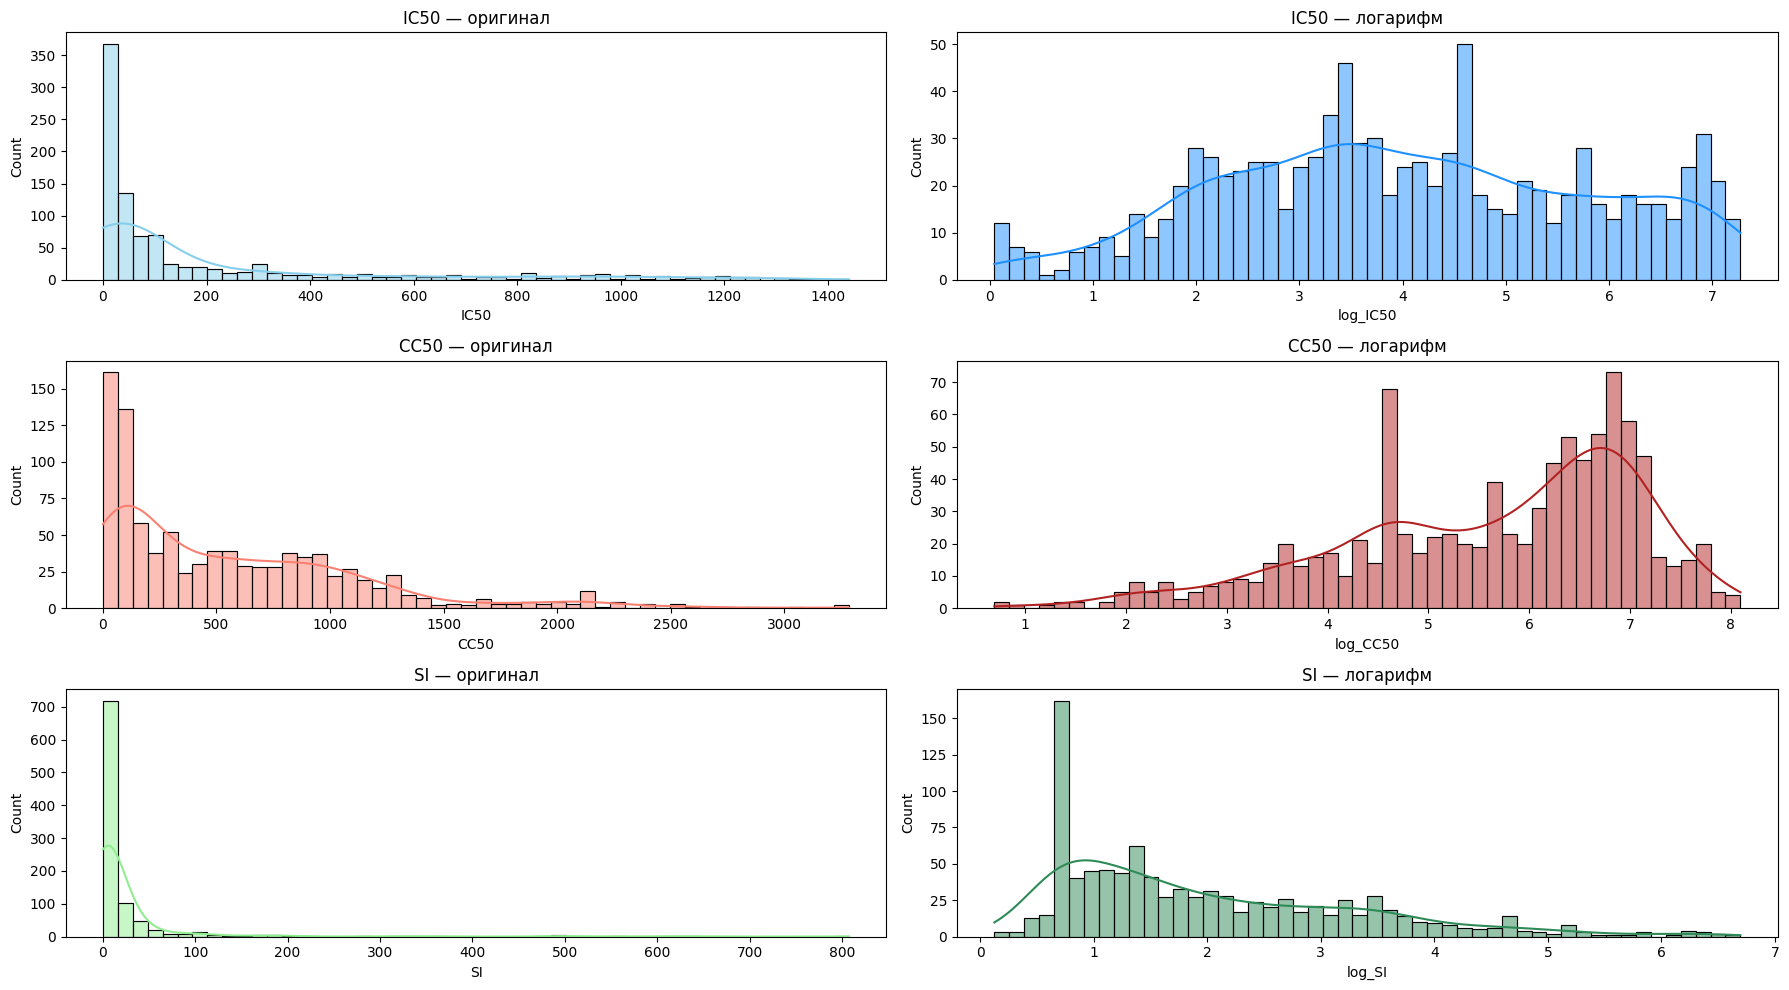

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

# IC50
plt.subplot(3, 2, 1)
sns.histplot(df_filtered['IC50'], bins=50, kde=True, color='skyblue')
plt.title('IC50 — оригинал')

plt.subplot(3, 2, 2)
sns.histplot(df_filtered['log_IC50'], bins=50, kde=True, color='dodgerblue')
plt.title('IC50 — логарифм')

# CC50
plt.subplot(3, 2, 3)
sns.histplot(df_filtered['CC50'], bins=50, kde=True, color='salmon')
plt.title('CC50 — оригинал')

plt.subplot(3, 2, 4)
sns.histplot(df_filtered['log_CC50'], bins=50, kde=True, color='firebrick')
plt.title('CC50 — логарифм')

# SI
plt.subplot(3, 2, 5)
sns.histplot(df_filtered['SI'], bins=50, kde=True, color='lightgreen')
plt.title('SI — оригинал')

plt.subplot(3, 2, 6)
sns.histplot(df_filtered['log_SI'], bins=50, kde=True, color='seagreen')
plt.title('SI — логарифм')

plt.tight_layout()
plt.show()


распределения после логарифмирования стали намного ровнее, хвосты укоротились, пики сгладились, особенно у ic50 и cc50 теперь ближе к нормальному, у si всё ещё с перекосом, но значительно лучше чем было

Итог:
данные очищены от пропусков и выбросов, удалены нерелевантные признаки, проведён полный анализ распределений и взаимосвязей, логарифмирование ic50, cc50 и si привело к улучшению распределений - признаки готовы к обучению моделей, можно переходить к построению решений для задач регрессии и классификации